<a href="https://colab.research.google.com/github/mlartorg/visualML/blob/master/lucid_paint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## General Setup

In [1]:
!pip install --quiet lucid
#tensorflow_version only works in colab
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('1')

from lucid.misc.io import show, load
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

TensorFlow 1.x selected.


## Import Modelzoo

In [0]:
# Lucid's modelzoo can be accessed as classes in vision_models
import lucid.modelzoo.vision_models as models
 
# ... or throguh a more systematic factory API
import lucid.modelzoo.nets_factory as nets

In [3]:
model = models.InceptionV3_slim()
model.load_graphdef()

model.show_graph()

In [0]:
from lucid.optvis.objectives import deepdream

In [0]:
model.layers

[Layer (belonging to InceptionV3_slim) <InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu: 32> ([{'conv'}]),
 Layer (belonging to InceptionV3_slim) <InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu: 32> ([{'conv'}]),
 Layer (belonging to InceptionV3_slim) <InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu: 64> ([{'conv'}]),
 Layer (belonging to InceptionV3_slim) <InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu: 80> ([{'conv'}]),
 Layer (belonging to InceptionV3_slim) <InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu: 192> ([{'conv'}]),
 Layer (belonging to InceptionV3_slim) <InceptionV3/InceptionV3/Mixed_5b/concat: 256> ([{'conv'}]),
 Layer (belonging to InceptionV3_slim) <InceptionV3/InceptionV3/Mixed_5c/concat: 288> ([{'conv'}]),
 Layer (belonging to InceptionV3_slim) <InceptionV3/InceptionV3/Mixed_5d/concat: 288> ([{'conv'}]),
 Layer (belonging to InceptionV3_slim) <InceptionV3/InceptionV3/Mixed_6a/concat: 768> ([{'conv'}]),
 Layer (belonging to InceptionV3_slim) <InceptionV3/InceptionV3/Mixed_6b/concat: 768> ([{

In [0]:
obj = sum([deepdream(l.name) for l in model.layers[-4:-1]])

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
!nvidia-smi

Tue May 12 15:29:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    76W / 149W |  11090MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


512 21.695766



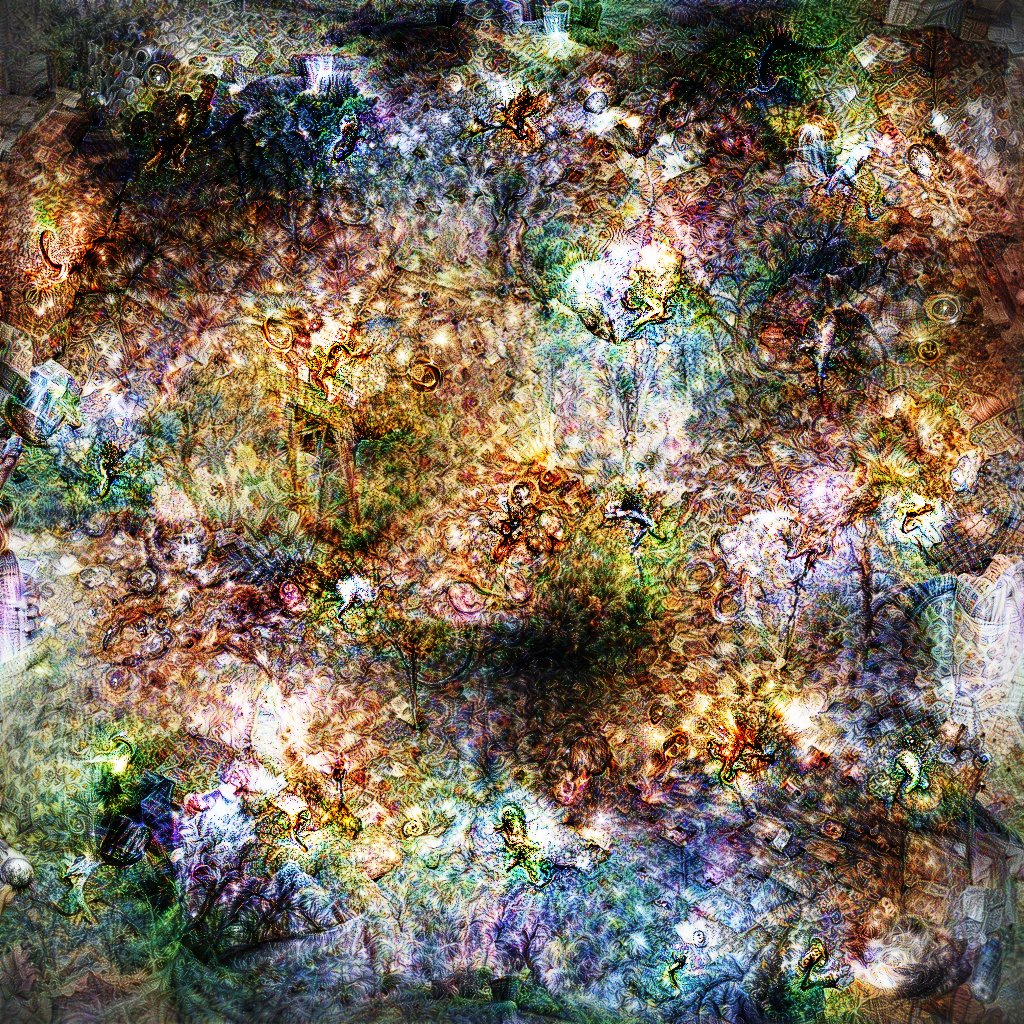

In [7]:
_ = render.render_vis(model, obj, lambda: param.image(1024, decorrelate=True, fft=True)) # , transforms=transforms) # , transforms=transforms) # transforms=random_rotate(np.linspace(0, 360, 360)))